In [23]:

import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import time
from datetime import datetime
from sklearn.cluster import MiniBatchKMeans, KMeans
import gpxpy.geo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import folium as folium
import math
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable










In [4]:
df1 = pd.read_csv('yellow_tripdata_2020-01 (2).csv')
df2 = pd.read_csv('yellow_tripdata_2020-02.csv')
df3 = pd.read_csv('yellow_tripdata_2020-03.csv')
frames = [df1,df2,df3]
result = pd.concat (frames)
result.shape


C:\Users\gowth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(15711654, 18)

In [5]:
result.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [23]:
df1.shape

(6405008, 18)

In [5]:
df2.shape

(6299354, 18)

In [6]:
df3.shape

(3007292, 18)

In [7]:
df3.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3007287,NaN,2020-03-31 23:21:00,2020-03-31 23:33:00,NaN,5.43,NaN,NaN,137,87,NaN,30.47,0.0,0.5,0.0,0.0,0.3,33.77,2.5
3007288,NaN,2020-03-31 23:57:00,2020-04-01 00:26:00,NaN,13.21,NaN,NaN,137,71,NaN,37.97,0.0,0.5,0.0,0.0,0.3,41.27,2.5
3007289,NaN,2020-03-31 23:22:01,2020-03-31 23:43:52,NaN,12.14,NaN,NaN,137,32,NaN,37.10,0.0,0.0,0.0,0.0,0.3,39.90,2.5
3007290,NaN,2020-03-31 23:18:53,2020-03-31 23:32:21,NaN,7.01,NaN,NaN,137,159,NaN,20.07,0.0,0.0,0.0,0.0,0.3,22.87,2.5
3007291,NaN,2020-03-31 23:11:00,2020-03-31 23:30:00,NaN,6.31,NaN,NaN,185,69,NaN,23.40,0.0,0.5,0.0,0.0,0.3,24.20,0.0


In [8]:
result.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3007287,NaN,2020-03-31 23:21:00,2020-03-31 23:33:00,NaN,5.43,NaN,NaN,137,87,NaN,30.47,0.0,0.5,0.0,0.0,0.3,33.77,2.5
3007288,NaN,2020-03-31 23:57:00,2020-04-01 00:26:00,NaN,13.21,NaN,NaN,137,71,NaN,37.97,0.0,0.5,0.0,0.0,0.3,41.27,2.5
3007289,NaN,2020-03-31 23:22:01,2020-03-31 23:43:52,NaN,12.14,NaN,NaN,137,32,NaN,37.10,0.0,0.0,0.0,0.0,0.3,39.90,2.5
3007290,NaN,2020-03-31 23:18:53,2020-03-31 23:32:21,NaN,7.01,NaN,NaN,137,159,NaN,20.07,0.0,0.0,0.0,0.0,0.3,22.87,2.5
3007291,NaN,2020-03-31 23:11:00,2020-03-31 23:30:00,NaN,6.31,NaN,NaN,185,69,NaN,23.40,0.0,0.5,0.0,0.0,0.3,24.20,0.0


In [9]:
result.reset_index(drop=True)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15711649,NaN,2020-03-31 23:21:00,2020-03-31 23:33:00,NaN,5.43,NaN,NaN,137,87,NaN,30.47,0.0,0.5,0.00,0.0,0.3,33.77,2.5
15711650,NaN,2020-03-31 23:57:00,2020-04-01 00:26:00,NaN,13.21,NaN,NaN,137,71,NaN,37.97,0.0,0.5,0.00,0.0,0.3,41.27,2.5
15711651,NaN,2020-03-31 23:22:01,2020-03-31 23:43:52,NaN,12.14,NaN,NaN,137,32,NaN,37.10,0.0,0.0,0.00,0.0,0.3,39.90,2.5
15711652,NaN,2020-03-31 23:18:53,2020-03-31 23:32:21,NaN,7.01,NaN,NaN,137,159,NaN,20.07,0.0,0.0,0.00,0.0,0.3,22.87,2.5


In [10]:
result.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [11]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15711654 entries, 0 to 3007291
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 2.2+ GB


<AxesSubplot:>

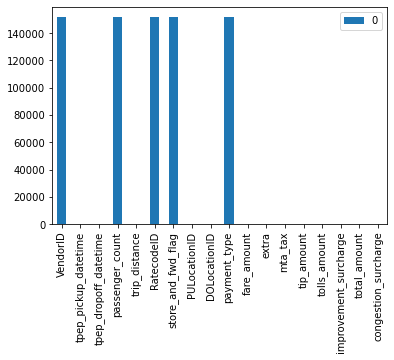

In [12]:
missing=pd.DataFrame(result.isnull().sum())
missing.plot(kind='bar',stacked=True)

In [13]:
result.notnull().sum()

VendorID                 15559892
tpep_pickup_datetime     15711654
tpep_dropoff_datetime    15711654
passenger_count          15559892
trip_distance            15711654
RatecodeID               15559892
store_and_fwd_flag       15559892
PULocationID             15711654
DOLocationID             15711654
payment_type             15559892
fare_amount              15711654
extra                    15711654
mta_tax                  15711654
tip_amount               15711654
tolls_amount             15711654
improvement_surcharge    15711654
total_amount             15711654
congestion_surcharge     15711654
dtype: int64

In [14]:
result.isnull().sum()/len(result)*100

VendorID                 0.96592
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.96592
trip_distance            0.00000
RatecodeID               0.96592
store_and_fwd_flag       0.96592
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.96592
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.00000
dtype: float64

In [15]:
for i in result.columns:
    print(i,'-->',result[i].nunique())

VendorID --> 2
tpep_pickup_datetime --> 5387192
tpep_dropoff_datetime --> 5392752
passenger_count --> 10
trip_distance --> 6427
RatecodeID --> 7
store_and_fwd_flag --> 2
PULocationID --> 262
DOLocationID --> 263
payment_type --> 5
fare_amount --> 8031
extra --> 243
mta_tax --> 19
tip_amount --> 4651
tolls_amount --> 1588
improvement_surcharge --> 3
total_amount --> 16096
congestion_surcharge --> 10


In [16]:
result.shape

(15711654, 18)

In [17]:
result[result.duplicated()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6345634,NaN,2020-01-06 06:14:00,2020-01-06 07:03:00,NaN,21.69,NaN,NaN,72,116,NaN,47.08,2.75,0.5,0.0,6.12,0.3,56.75,0.0
6345636,NaN,2020-01-06 06:52:00,2020-01-06 07:25:00,NaN,10.45,NaN,NaN,89,68,NaN,32.27,2.75,0.5,0.0,6.12,0.3,41.94,0.0
6345638,NaN,2020-01-06 06:10:00,2020-01-06 06:46:29,NaN,8.70,NaN,NaN,76,45,NaN,38.27,2.75,0.0,0.0,0.00,0.3,41.32,0.0
6345640,NaN,2020-01-06 06:11:00,2020-01-06 06:42:00,NaN,6.64,NaN,NaN,213,152,NaN,18.66,2.75,0.5,0.0,6.12,0.3,28.33,0.0
6345642,NaN,2020-01-06 06:30:00,2020-01-06 07:11:00,NaN,12.76,NaN,NaN,169,249,NaN,51.05,2.75,0.5,0.0,0.00,0.3,54.60,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373809,NaN,2020-01-12 23:07:00,2020-01-12 23:19:00,NaN,5.93,NaN,NaN,52,14,NaN,20.87,2.75,0.5,0.0,0.00,0.3,24.42,0.0
6373811,NaN,2020-01-12 23:19:00,2020-01-12 23:38:00,NaN,7.99,NaN,NaN,242,42,NaN,25.88,2.75,0.5,0.0,0.00,0.3,29.43,0.0
6373813,NaN,2020-01-12 23:25:00,2020-01-12 23:56:00,NaN,-20.94,NaN,NaN,86,170,NaN,54.01,2.75,0.5,0.0,6.12,0.3,63.68,0.0
6373815,NaN,2020-01-12 23:29:22,2020-01-12 23:45:44,NaN,3.37,NaN,NaN,107,256,NaN,24.06,2.75,0.0,0.0,0.00,0.3,27.11,0.0


In [26]:
result.drop_duplicates(inplace=True)


In [27]:
result.dropna(inplace=True)

In [28]:
result.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [21]:
convert_dict = {'VendorID': int, 'passenger_count' : int, 'RatecodeID' : int, 'store_and_fwd_flag' : str }
result = result.astype(convert_dict)
print(result.dtypes)



VendorID                   int32
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int32
trip_distance            float64
RatecodeID                 int32
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object


In [22]:
result["VendorID"] = result["VendorID"].astype('int64')

In [23]:
result['VendorID'].head()

0    1
1    1
2    1
3    1
4    2
Name: VendorID, dtype: int64

In [24]:
result["tpep_dropoff_datetime"] = pd.to_datetime(result['tpep_dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')
result["tpep_pickup_datetime"] = pd.to_datetime(result['tpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')

In [25]:
result['tpep_dropoff_datetime'].head()

0   2020-01-01 00:33:03
1   2020-01-01 00:43:04
2   2020-01-01 00:53:52
3   2020-01-01 01:00:14
4   2020-01-01 00:04:16
Name: tpep_dropoff_datetime, dtype: datetime64[ns]

In [26]:
result.nlargest(10,['tpep_dropoff_datetime'])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
275046,2,2021-01-02 01:12:10,2021-01-02 01:25:01,1,1.87,1,N,90,148,1.0,10.0,1.0,0.5,2.86,0.0,0.3,17.16,2.5
275045,2,2021-01-02 00:44:08,2021-01-02 00:58:56,1,2.32,1,N,170,148,2.0,11.5,1.0,0.5,0.00,0.0,0.3,15.80,2.5
275044,2,2021-01-02 00:22:00,2021-01-02 00:36:50,1,1.56,1,N,142,161,2.0,10.5,1.0,0.5,0.00,0.0,0.3,14.80,2.5
2023407,2,2020-08-27 15:16:15,2020-08-27 15:21:14,1,0.72,1,N,164,170,1.0,5.5,0.5,0.5,1.86,0.0,0.3,11.16,2.5
2023406,2,2020-08-06 07:20:56,2020-08-06 07:36:32,1,4.49,1,N,230,74,1.0,15.0,0.5,0.5,3.76,0.0,0.3,22.56,2.5
2015065,2,2020-08-06 07:01:14,2020-08-06 07:19:38,1,2.01,1,N,141,230,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
4282277,2,2020-07-31 18:50:41,2020-07-31 18:54:12,1,0.72,1,N,236,43,2.0,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5
2586728,2,2020-07-19 21:46:42,2020-07-19 21:56:14,6,2.09,1,N,140,236,1.0,9.0,0.5,0.5,2.56,0.0,0.3,15.36,2.5
2005864,2,2020-07-15 23:16:07,2020-07-15 23:27:21,1,2.77,1,N,162,146,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
2844571,2,2020-07-11 12:57:52,2020-07-11 12:59:24,4,0.69,1,N,170,162,1.0,4.0,0.5,0.5,1.00,0.0,0.3,8.80,2.5


In [27]:
result.nlargest(100,['trip_distance'])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1582817,2,2020-02-08 08:58:50,2020-02-08 15:03:36,3,369.94,3,N,48,265,2.0,960.5,0.0,0.0,0.00,0.00,0.3,960.80,0.0
2744190,1,2020-03-17 13:38:51,2020-03-17 19:36:51,1,310.90,1,N,68,265,1.0,804.0,2.5,0.5,170.61,45.76,0.3,1023.67,2.5
2424311,1,2020-02-12 11:36:07,2020-02-12 17:43:11,2,274.50,3,N,48,100,1.0,735.5,0.0,0.0,149.51,11.75,0.3,897.06,0.0
2154680,2,2020-01-12 09:19:23,2020-01-12 13:49:59,4,262.88,5,N,132,265,1.0,600.0,0.0,0.0,0.00,55.55,0.3,658.35,2.5
565751,2,2020-01-04 12:52:02,2020-01-04 17:23:52,4,259.22,5,N,140,265,2.0,575.0,0.0,0.0,0.00,0.00,0.3,577.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949382,1,2020-03-29 15:19:23,2020-03-29 16:55:29,1,91.30,1,N,249,265,2.0,232.5,2.5,0.5,0.00,0.00,0.3,235.80,2.5
2863449,1,2020-03-21 13:07:24,2020-03-21 16:25:33,1,91.10,1,N,186,186,1.0,271.0,2.5,0.5,0.00,12.24,0.3,286.54,2.5
5424531,2,2020-01-27 23:48:41,2020-01-28 01:29:31,1,90.81,4,N,132,265,1.0,408.5,0.5,0.5,10.00,6.12,0.3,425.92,0.0
590384,1,2020-03-03 23:47:12,2020-03-04 02:12:03,1,90.80,4,N,79,4,1.0,409.5,3.0,0.5,0.00,0.00,0.3,413.30,2.5


In [28]:
result.nlargest(20,['DOLocationID'])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
131,2,2020-01-01 00:53:21,2020-01-01 01:16:14,1,12.92,1,N,132,265,1.0,36.0,0.5,0.5,7.46,0.00,0.3,44.76,0.0
303,2,2020-01-01 00:46:10,2020-01-01 01:09:35,1,10.91,4,N,132,265,1.0,45.5,0.5,0.5,9.36,0.00,0.3,56.16,0.0
790,2,2020-01-01 00:45:35,2020-01-01 01:45:11,2,37.61,5,N,239,265,2.0,144.0,0.0,0.5,0.00,10.50,0.3,157.80,2.5
1280,2,2020-01-01 00:08:29,2020-01-01 00:32:50,1,13.82,4,N,138,265,2.0,45.0,0.5,0.5,0.00,0.00,0.3,46.30,0.0
1306,2,2020-01-01 00:49:43,2020-01-01 00:50:46,1,0.00,5,N,265,265,1.0,45.0,0.0,0.0,0.00,10.50,0.3,55.80,0.0
1376,1,2020-01-01 00:57:04,2020-01-01 01:50:08,2,29.40,4,N,142,265,1.0,100.5,3.0,0.5,0.00,6.12,0.3,110.42,2.5
1869,2,2020-01-01 00:10:56,2020-01-01 00:48:31,1,25.92,1,N,132,265,1.0,67.5,0.5,0.5,10.32,0.00,0.3,79.12,0.0
2206,2,2020-01-01 00:04:14,2020-01-01 00:36:32,3,22.09,4,N,132,265,2.0,65.0,0.5,0.5,0.00,6.12,0.3,72.42,0.0
2261,2,2020-01-01 00:38:44,2020-01-01 00:57:11,2,4.82,3,N,114,265,1.0,34.5,0.5,0.0,9.16,10.50,0.3,54.96,0.0
2441,1,2020-01-01 00:38:42,2020-01-01 00:38:54,1,0.00,2,N,265,265,1.0,52.0,0.0,0.5,15.80,0.00,0.3,68.60,0.0


In [29]:
categorical_columns=[i for i in result.columns if result.dtypes[i]=='object']
categorical_columns

['store_and_fwd_flag']

In [30]:
quantitative_columns=[i for i in result.columns if result.dtypes[i]!='object']
quantitative_columns


['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge']

In [31]:
result.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07,1.555989e+07
mean,1.669723e+00,1.501829e+00,2.819720e+00,1.056658e+00,1.647030e+02,1.625915e+02,1.264918e+00,1.248948e+01,1.128062e+00,5.258608e-01,2.212534e+00,3.189722e-01,2.978636e-01,1.851127e+01,2.296497e+00
std,4.703128e-01,1.143014e+00,3.683293e+00,7.794382e-01,6.559699e+01,6.989787e+01,4.722203e-01,1.705354e+02,1.267616e+02,1.267555e+02,2.718197e+00,1.680491e+00,3.492626e-02,3.056409e+02,7.067540e-01
min,1.000000e+00,0.000000e+00,-2.218000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.259000e+03,-2.700000e+01,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.960000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.900000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.900000e+00,0.000000e+00,3.000000e-01,1.975000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,3.699400e+02,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.711001e+05,5.000008e+05,5.000005e+05,1.100000e+03,9.255000e+02,3.000000e-01,1.000004e+06,2.750000e+00


In [32]:
result.skew()

VendorID                   -0.721745
passenger_count             2.441252
trip_distance               3.826656
RatecodeID                100.683703
PULocationID               -0.294898
DOLocationID               -0.344003
payment_type                1.629602
fare_amount              3916.413441
extra                    3944.027962
mta_tax                  3944.601097
tip_amount                 16.260268
tolls_amount               69.938405
improvement_surcharge     -16.655201
total_amount             2931.103197
congestion_surcharge       -3.398369
dtype: float64

In [34]:
result.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.184786,0.028215,0.008190,-0.010839,-0.004547,-0.013125,0.000736,-0.008395,0.000162,0.021795,0.007201,-0.040693,0.000760,-0.014451
passenger_count,0.184786,1.000000,0.010195,-0.003182,-0.004579,-0.003028,0.007843,0.000803,-0.001649,-0.000109,-0.000562,0.004811,0.005188,0.000424,0.013127
trip_distance,0.028215,0.010195,1.000000,0.147807,-0.094145,-0.101623,-0.012448,0.058293,-0.000331,-0.000222,0.518953,0.550444,0.016648,0.039706,-0.200901
RatecodeID,0.008190,-0.003182,0.147807,1.000000,-0.009217,0.002993,0.007094,0.017072,0.031615,0.031754,0.144098,0.152972,-0.039512,0.037800,-0.105422
PULocationID,-0.010839,-0.004579,-0.094145,-0.009217,1.000000,0.100398,-0.033333,-0.005347,0.000355,0.000112,-0.028800,-0.043293,0.003458,-0.003121,0.128728
DOLocationID,-0.004547,-0.003028,-0.101623,0.002993,0.100398,1.000000,-0.033153,-0.005709,0.000308,0.000121,-0.032139,-0.053880,0.001486,-0.003417,0.122826
payment_type,-0.013125,0.007843,-0.012448,0.007094,-0.033333,-0.033153,1.000000,-0.001799,0.000079,0.000284,-0.456510,-0.027900,-0.242780,-0.005536,-0.214115
fare_amount,0.000736,0.000803,0.058293,0.017072,-0.005347,-0.005709,-0.001799,1.000000,-0.000027,-0.000017,0.037629,0.036326,0.007870,0.558460,-0.013413
extra,-0.008395,-0.001649,-0.000331,0.031615,0.000355,0.000308,0.000079,-0.000027,1.000000,0.999952,-0.000071,-0.000088,-0.001489,0.829393,0.001044
mta_tax,0.000162,-0.000109,-0.000222,0.031754,0.000112,0.000121,0.000284,-0.000017,0.999952,1.000000,-0.000238,-0.000121,-0.001718,0.829427,-0.000604


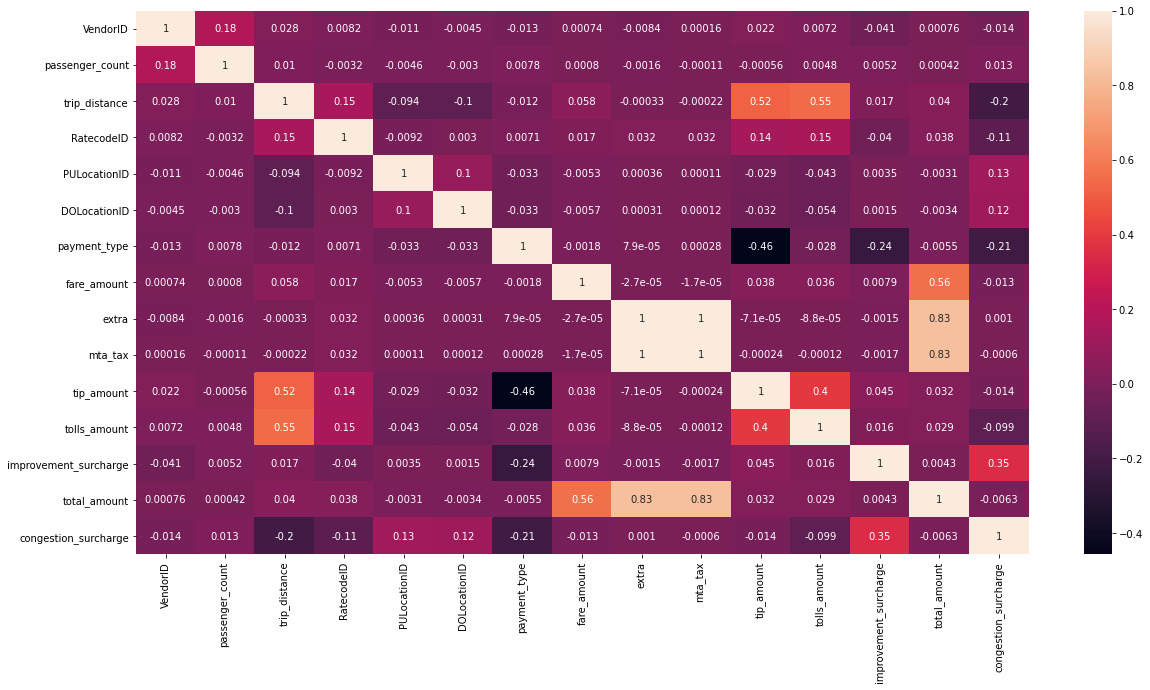

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(result.corr(),annot=True)
plt.show()

In [36]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15559892 entries, 0 to 2969804
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int32         
 4   trip_distance          float64       
 5   RatecodeID             int32         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2),

<AxesSubplot:xlabel='VendorID', ylabel='total_amount'>

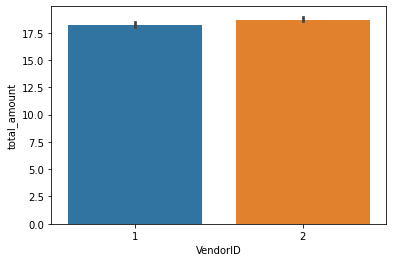

In [37]:
sns.barplot(x=result['VendorID'],y=result['total_amount'])

<AxesSubplot:xlabel='VendorID', ylabel='PULocationID'>

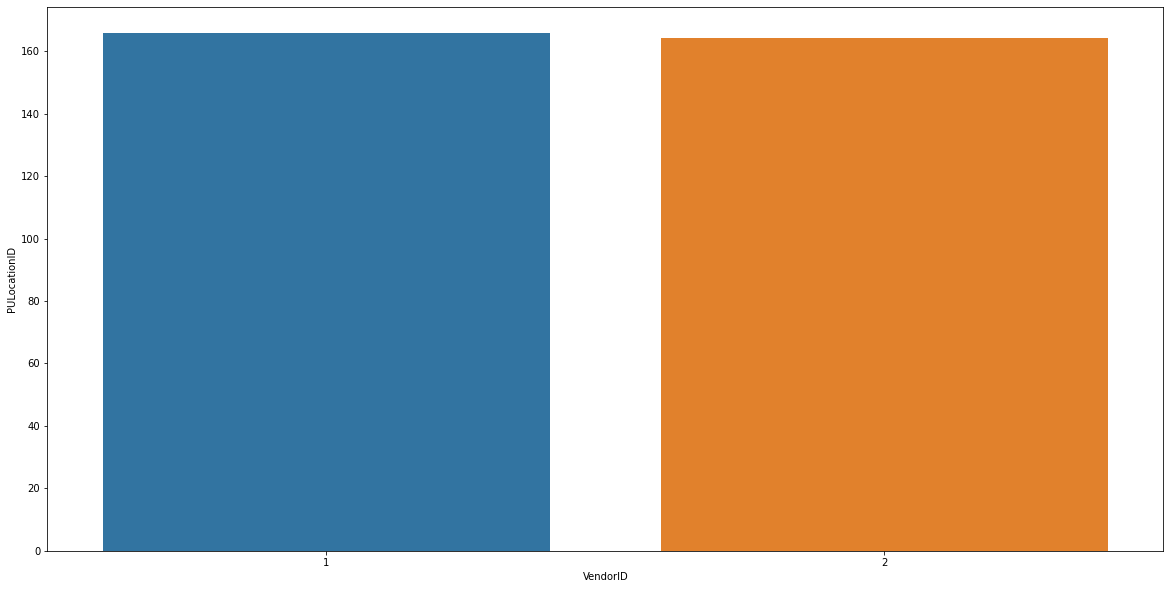

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x=result['VendorID'],y=result['PULocationID'])

Text(0.5, 1.0, 'pickup location id')

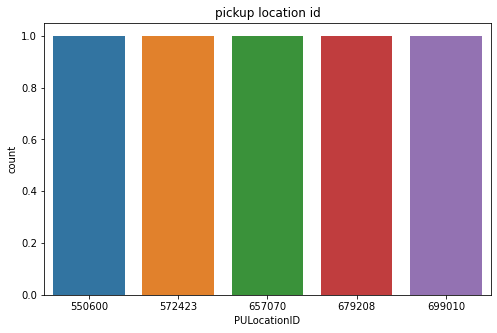

In [39]:
plt.figure(figsize = (8, 5))
sns.countplot(x = result['PULocationID'].value_counts().head()).set_title('pickup location id')

In [40]:
result['PULocationID'].value_counts().head()

237    699010
161    679208
236    657070
162    572423
186    550600
Name: PULocationID, dtype: int64

<AxesSubplot:>

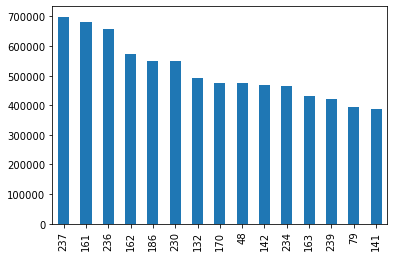

In [41]:
result['PULocationID'].value_counts().head(15).plot(kind='bar')

In [42]:
result['DOLocationID'].value_counts().head()

236    694059
237    631569
161    601960
170    478910
162    465551
Name: DOLocationID, dtype: int64

<AxesSubplot:>

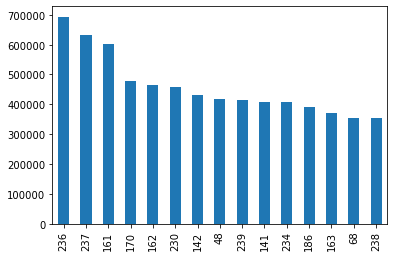

In [43]:
result['DOLocationID'].value_counts().head(15).plot(kind='bar')

In [44]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15559892 entries, 0 to 2969804
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int32         
 4   trip_distance          float64       
 5   RatecodeID             int32         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2),

In [45]:
num_data=result.select_dtypes(np.number)
num_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,1,1.2,1,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,1,1.2,1,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,1,0.6,1,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,1,0.8,1,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,1,0.0,1,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


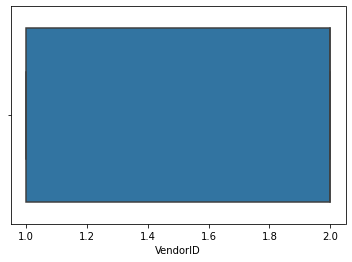

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


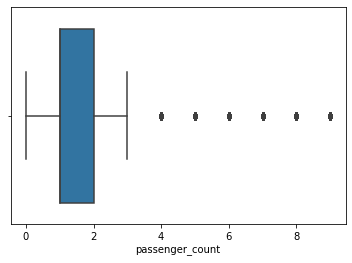

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


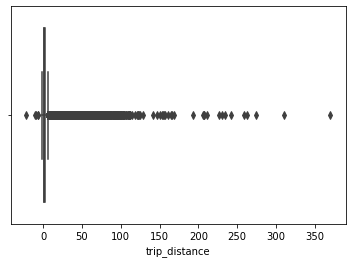

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


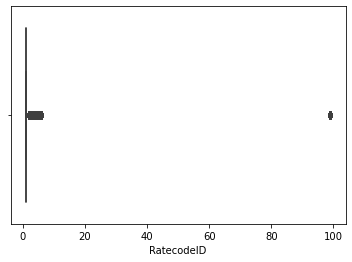

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


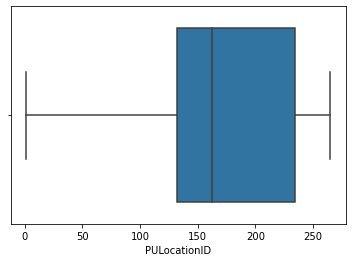

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


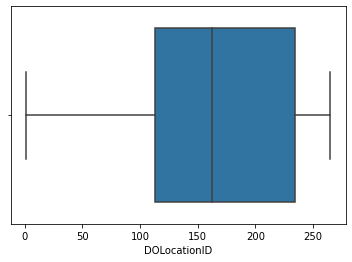

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


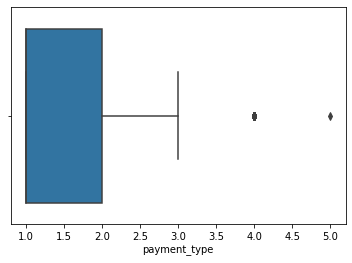

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


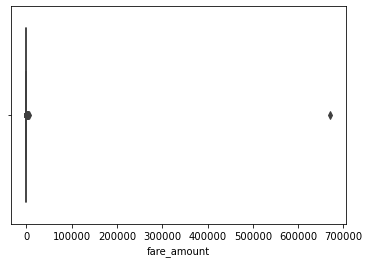

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


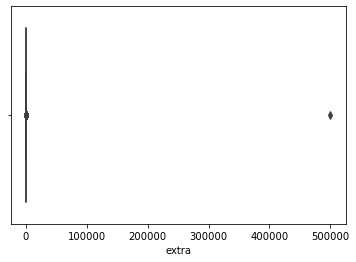

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


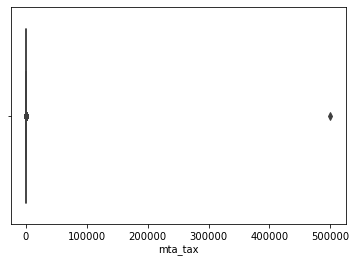

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


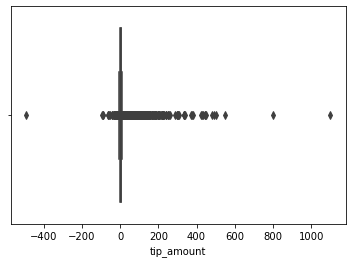

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


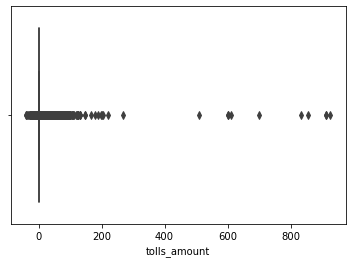

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


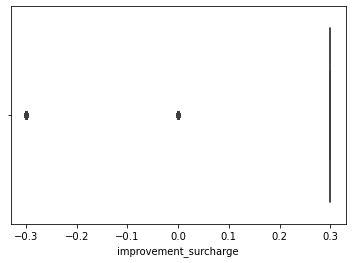

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


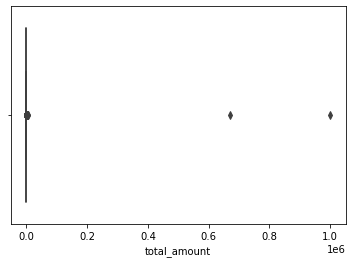

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


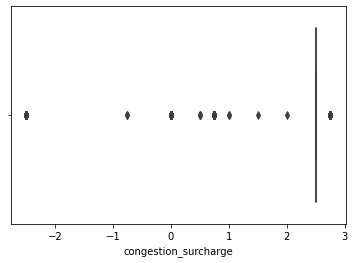

In [46]:
for i in num_data.columns:
    sns.boxplot(result[i])
    plt.show()

<AxesSubplot:ylabel='payment_type'>

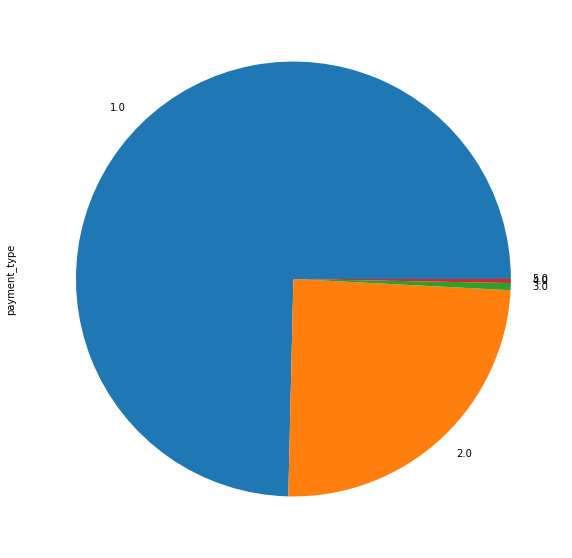

In [47]:
plt.figure(figsize=(10,10))
result['payment_type'].value_counts().head(10).plot(kind='pie')

<AxesSubplot:ylabel='payment_type'>

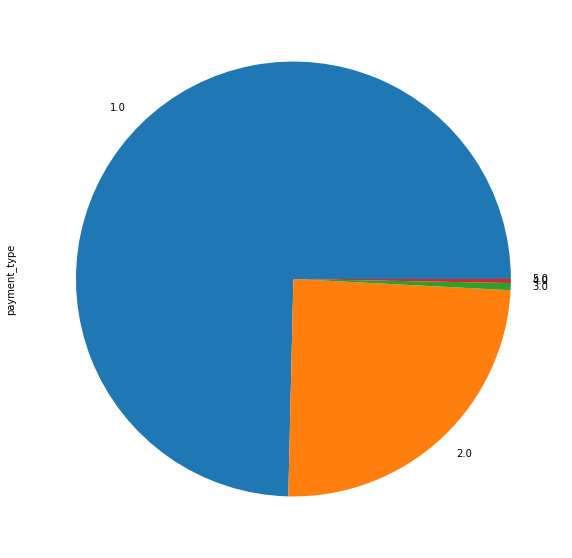

In [49]:
plt.figure(figsize=(10,10))
result['payment_type'].value_counts().head(10).plot(kind='pie')

In [50]:
result['payment_type'].value_counts()

1.0    11611652
2.0     3820369
3.0       81894
4.0       45976
5.0           1
Name: payment_type, dtype: int64

In [51]:
result['RatecodeID'].value_counts()

1     15070732
2       357532
5        86684
3        32065
4        12007
99         783
6           89
Name: RatecodeID, dtype: int64

<AxesSubplot:ylabel='RatecodeID'>

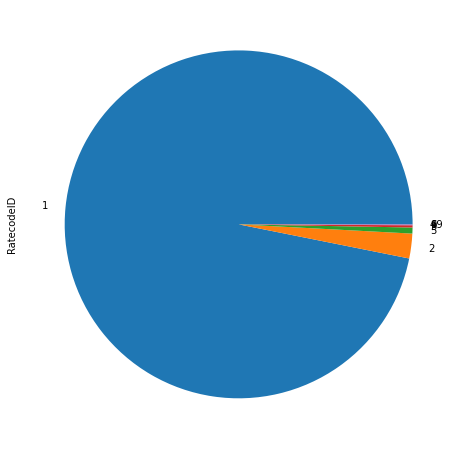

In [52]:
plt.figure(figsize=(10,8))
result['RatecodeID'].value_counts().head(10).plot(kind='pie')

In [53]:
result['tpep_pickup_datetime'].head()

0   2020-01-01 00:28:15
1   2020-01-01 00:35:39
2   2020-01-01 00:47:41
3   2020-01-01 00:55:23
4   2020-01-01 00:01:58
Name: tpep_pickup_datetime, dtype: datetime64[ns]

In [54]:
pd.DatetimeIndex(result['tpep_pickup_datetime']).month

Int64Index([ 1,  1,  1,  1,  1,  1,  1, 12, 12,  1,
            ...
             3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
           dtype='int64', name='tpep_pickup_datetime', length=15559892)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PULocationID', ylabel='DOLocationID'>

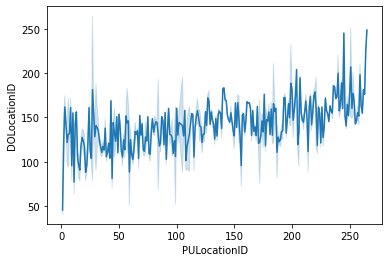

In [59]:
sns.lineplot(result['PULocationID'],result['DOLocationID'])

<AxesSubplot:xlabel='payment_type', ylabel='count'>

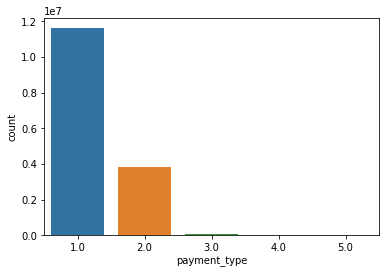

In [58]:
sns.countplot(result['payment_type'])

In [33]:
df = pd.read_csv('taxi_zone_lookup.csv')
df.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [29]:
map_osm = folium.Map(location=[40.730610,-73.935242],zoom_start = 10,)
map_osm


In [ ]:
outlier_locations = result[((result.PULocationID < 1)|  (result.PULocationID > 265) \
                            (result.DOLocationID < 1) | (result.DOLocationID > 265))]
df.drop(outlier_locations)


In [6]:
def trip_duration(df):
    df['tpep_pickup_datetime']  = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime']  = pd.to_datetime(df['tpep_dropoff_datetime'])
    trip_duration = np.array(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])
    trip_duration = trip_duration/1000000000/60
    df['trip_duration'] = trip_duration.astype(float)
    nrows = df.shape[0]
    df.drop(df[(df['trip_duration'] > 200) | 
               (df['trip_duration'] <= 0)].index, inplace = True)
    print("Number of rows removed due to wrong trip_duration {}".format(nrows - df.shape[0]))
trip_duration(result)
    
    


Number of rows removed due to wrong trip_duration 502818


In [8]:
def speed(df):
    df['speed'] = df['trip_distance']/df['trip_duration']*60
def outliers(df):
    nrows = df.shape[0]
    df.drop(df[((df['speed'] <= 0) | (df['speed'] > 70))].index, inplace = True)
    print("Number of rows removed due to speed outliers {}".format(nrows - df.shape[0]))
speed(result)
outliers(result)



Number of rows removed due to speed outliers 0


In [9]:
coords = result[["PULocationID"]].values
regions = MiniBatchKMeans(n_clusters = 40, batch_size = 10000).fit(coords)
clusters = regions.predict(result[["PULocationID"]])
result["pickup_cluster"] = clusters
print(result["pickup_cluster"])



C:\Users\gowth\anaconda3\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


0           8
2           8
3           8
9          30
10         30
           ..
3007287     3
3007288     3
3007289     3
3007290     3
3007291     7
Name: pickup_cluster, Length: 15055556, dtype: int32


In [10]:
def pickuptime(df):
    return df.rename(columns={'tpep_pickup_datetime': 'pickup_time'})

result = pickuptime(result)
result.head()

,VendorID,pickup_time,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,speed,pickup_cluster
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,...,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.0,18.000000,8
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,...,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.0,6.000000,8
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,...,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.0,12.000000,8
9,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.7,1.0,N,246,48,1.0,...,3.0,0.5,2.35,0.0,0.3,14.15,2.5,11.0,3.818182,30
10,1.0,2020-01-01 00:55:11,2020-01-01 01:12:03,2.0,2.4,1.0,N,246,79,1.0,...,3.0,0.5,1.75,0.0,0.3,17.55,2.5,16.0,9.000000,30


In [11]:
df = result.groupby(['pickup_time','pickup_cluster']).size().reset_index(name='count')
df

,pickup_time,pickup_cluster,count
0,2008-12-31 22:20:23,8,1
1,2008-12-31 23:05:29,37,1
2,2008-12-31 23:06:13,29,1
3,2008-12-31 23:11:02,22,1
4,2008-12-31 23:17:15,0,1
...,...,...,...
14094166,2020-08-06 07:01:14,12,1
14094167,2020-08-06 07:20:56,1,1
14094168,2020-08-27 15:16:15,27,1
14094169,2021-01-02 00:44:08,14,1


In [12]:
df['month'] = pd.DatetimeIndex(df['pickup_time']).month
df['day'] = pd.DatetimeIndex(df['pickup_time']).day
df['dayofweek'] = pd.DatetimeIndex(df['pickup_time']).dayofweek
df['hour'] = pd.DatetimeIndex(df['pickup_time']).hour


In [13]:
df

,pickup_time,pickup_cluster,count,month,day,dayofweek,hour
0,2008-12-31 22:20:23,8,1,12,31,2,22
1,2008-12-31 23:05:29,37,1,12,31,2,23
2,2008-12-31 23:06:13,29,1,12,31,2,23
3,2008-12-31 23:11:02,22,1,12,31,2,23
4,2008-12-31 23:17:15,0,1,12,31,2,23
...,...,...,...,...,...,...,...
14094166,2020-08-06 07:01:14,12,1,8,6,3,7
14094167,2020-08-06 07:20:56,1,1,8,6,3,7
14094168,2020-08-27 15:16:15,27,1,8,27,3,15
14094169,2021-01-02 00:44:08,14,1,1,2,5,0


In [17]:
result1 = df[['pickup_cluster', 'month', 'day', 'hour', 'dayofweek']]
pred1 = df['count']



In [18]:
print(len(result1))
print(len(pred1))

14094171
14094171


In [24]:

X_train, X_test, Y_train, Y_test = train_test_split(result1.values, pred1.values, test_size=0.30)

In [25]:
regr=RandomForestRegressor()

In [ ]:
regr.fit(X_train, Y_train)


In [ ]:
rnd_predictions = regr.predict()

In [ ]:
def performance(algorithm_name, X_Test, Y_pred, Y_actual):
    r2 = r2_score(Y_actual, Y_pred)
    adj_r2 = 1-(1-r2)*((len(X_Test)-1)/(len(X_Test)-X_Test.shape[1]-1))
    mse = mean_squared_error(Y_actual, Y_pred)
    rmse = math.sqrt(mse)
    x = PrettyTable()
    x.add_row(['R2', r2])
    x.add_row(['Adjusted R2', adj_r2])
    x.add_row(['MSE',mse])
    x.add_row(['RMSE', rmse])
    x.title = algorithm_name
    print(x)
  

In [ ]:
performance('Random forest',X_Test=X_test, y_pred=rnd_predictions, y_true=Y_test)


In [29]:
XgbRegr = XGBRegressor(n_estimators=900, max_depth=6,colsample_bytree=0.8)


In [ ]:
XgbRegr.fit(X_train,Y_train)

In [ ]:
Xgb_predictions = Xgbregr.predict()